###Covid tracker

###Libraries

In [1]:
pip install requests==2.25.1

     |████████████████████████████████| 61 kB 3.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.25.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
pip install beautifulsoup4==4.9.3

     |████████████████████████████████| 115 kB 5.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [4]:
import requests as req
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

###Getting the data

In [5]:
html = req.get("https://www.worldometers.info/coronavirus/")

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>COVID Live - Coronavirus Statistics - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/favicon/appl
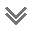

In [6]:
# checking the collected data
html.content

In [7]:
html_parsed = BeautifulSoup(html.content)

In [10]:
table = html_parsed.find('table', attrs={'id':'main_table_countries_today'})

In [11]:
# checking the result
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [12]:
# getting the rows
rows = table.find_all('tr')

In [13]:
#checking the collected rows
rows[0]

<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width="30">Active Cases/1M pop</th>
</tr>

In [14]:
rows[1]

<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>North America</nobr>
</td>
<td>89,395,699</td>
<td>+167,671</td>
<td>1,323,469</td>
<td>+2,403</td>
<td>57,631,829</td>
<td>+441,152</td>
<td>30,440,401</td>
<td>29,712</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="North America" style="display:none;">North America</td>
<td>
</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>

In [15]:
rows[0].text.strip()

'#\nCountry,Other\nTotalCases\nNewCases\nTotalDeaths\nNewDeaths\nTotalRecovered\nNewRecovered\nActiveCases\nSerious,Critical\nTot\xa0Cases/1M pop\nDeaths/1M pop\nTotalTests\nTests/\n1M pop\n\nPopulation\nContinent\n1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl\nNew Cases/1M pop\nNew Deaths/1M pop\nActive Cases/1M pop'

In [16]:
rows[0].text.strip().split('\n')

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/',
 '1M pop',
 '',
 'Population',
 'Continent',
 '1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [17]:
# the location of the first country's data is in the rows[9]

# storing the rows into a list
data = []
for x in rows:
  # get the first 5 columns
  data.append(x.text.strip().split('\n')[1:5])

In [18]:
df = pd.DataFrame(data)

In [20]:
df.head(10)

,0,1,2,3
0,"Country,Other",TotalCases,NewCases,TotalDeaths
1,,"89,395,699","+167,671","1,323,469"
2,,"101,002,899","+594,099","1,294,692"
3,,"48,685,726","+26,376","1,216,045"
4,,"128,234,213","+1,386,131","1,620,546"
5,,"11,037,745","+13,580","239,889"
6,,"2,770,552","+36,650","6,226"
7,,15,,706
8,"381,127,555","+2,224,507","5,700,882","+8,529"
9,USA,"76,365,165","+142,950","912,549"


In [21]:
df = pd.DataFrame(data[9:], columns=data[0])

In [22]:
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths
0,USA,"76,365,165","+142,950","912,549"
1,India,"41,628,075","+158,576","497,996"
2,Brazil,"25,454,105",,"627,365"
3,France,"19,557,626","+416,896","131,312"
4,UK,"17,428,345","+112,452","155,973"


In [23]:
# save the dataset as csv file
df.to_csv('covid19.csv')

###Pre-processing the data

In [25]:
df_plot = df[['Country,Other', 'TotalCases']]

In [28]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country,Other  233 non-null    object
 1   TotalCases     233 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [30]:
df_plot['TotalCases'] = df_plot['TotalCases'].apply(lambda x: x.replace(',',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df_plot['TotalCases'] = pd.to_numeric(df_plot['TotalCases'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country,Other  233 non-null    object 
 1   TotalCases     232 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.8+ KB


In [38]:
df_plot.tail(10)

,"Country,Other",TotalCases
223,Tonga,1.0
224,China,106139.0
225,"89,395,699",167671.0
226,"101,002,899",594099.0
227,"48,685,726",26376.0
228,"128,234,213",1386131.0
229,"11,037,745",13580.0
230,"2,770,552",36650.0
231,721,NaN
232,"381,127,555",2224507.0


In [40]:
df_plot = df_plot.drop([225, 226, 227, 228, 229, 230, 231, 232])

In [41]:
df_plot.tail(10)

,"Country,Other",TotalCases
215,Samoa,30.0
216,Vatican City,29.0
217,Western Sahara,10.0
218,MS Zaandam,9.0
219,Vanuatu,7.0
220,Marshall Islands,7.0
221,Saint Helena,2.0
222,Micronesia,1.0
223,Tonga,1.0
224,China,106139.0


### Visualizing the data

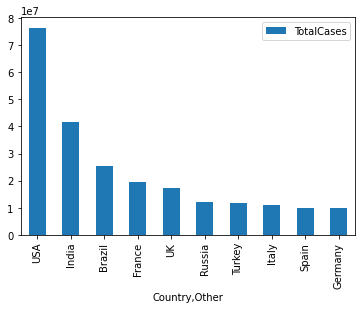

In [44]:
# sorting the data by number of cases
# df.sort_values(by='Forks',ascending=False)
df_plot = df_plot.sort_values(by='TotalCases', ascending=False)

# bar plotting  of the first 10 countries
df_plot[0:10].plot(kind='bar',
             x='Country,Other',
             y='TotalCases')

###Acknowledgements:
<p>Python course from Huawei: https://ilearningx.huawei.com/courses/</p>
<p>Data from Worldometer : https://www.worldometers.info/coronavirus/</p>